<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumCircuit_ifGate_Qiskit_ibm_provider_brisband_20250127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-ibm-provider==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=71a81392697291955410319cfc6f5956780516b40c1d14525885010379e06547
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
%pip show qiskit
%pip show qiskit-ibm-provider

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-ibm-provider
Name: qiskit-ibm-provider
Version: 0.11.0
Summary: Qiskit IBM Quantum Provider for accessing the quantum devices and simulators at IBM
Home-page: https://github.com/Qiskit/qiskit-ibm-provider
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, python-dateutil, qiskit, requests, requests-ntlm, typing-extensions, urllib3, websocket-client, websockets
Required-by: 


In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(127, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[126])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[126], creg_c[1])

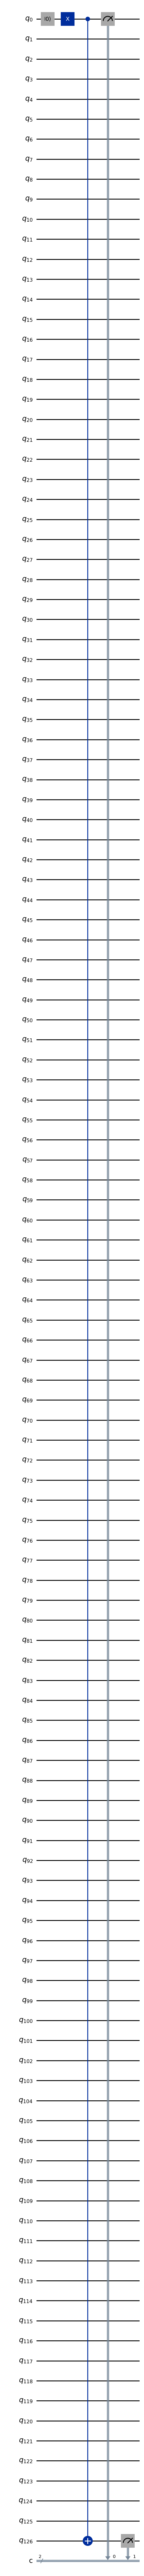

In [5]:
circuit.draw('mpl')

In [6]:
from qiskit.providers.backend import BackendV2

In [7]:
# 참조: https://github.com/Qiskit/qiskit-ibm-provider/blob/main/docs/tutorials/1_the_ibm_quantum_account.ipynb
# IBM Quantum Platform 서비스 사용하기 위한 준비
from qiskit_ibm_provider import IBMProvider

# IBM  Provider에 등록된 계정 정보를 입력합니다.
IBMProvider.save_account(token='704440e8ed009b3c31936710473c84af0c979115704179be8cbfc24b818138152408827cee30254a018d4c4e54698f2569c43de6959b67eb96d6fa4a39c2ae4d',overwrite=True)

# IBM Provider로 접속합니다.
ibm_provider = IBMProvider()

# 양자회로를 수행한 양자컴퓨터 백엔드 리스트 출력
#print(ibm_provider.backends())
print("Available backends:")

for backend in ibm_provider.backends():
  print(backend.name)
###for

<ipython-input-7-e330411ed4a6>:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


Available backends:
ibm_brisbane
ibm_sherbrooke
ibm_kyiv


In [8]:
ibm_brisbane_backend = ibm_provider.get_backend('ibm_brisbane')
ibm_brisbane_backend

<IBMBackend('ibm_brisbane')>

In [9]:
from qiskit.compiler import transpile, assemble
#양자컴 하드웨어마다 지원할 수 있는 Gate의 종류가 달라서, 일반GATE를 각 하드웨어 지원 Gate로 변환하는 과정을 Transpile이라 한다.
ibm_brisbane_trans_qc = transpile(circuit, ibm_brisbane_backend)
#ibm_kyiv_backend_trans_qc.draw('mpl')

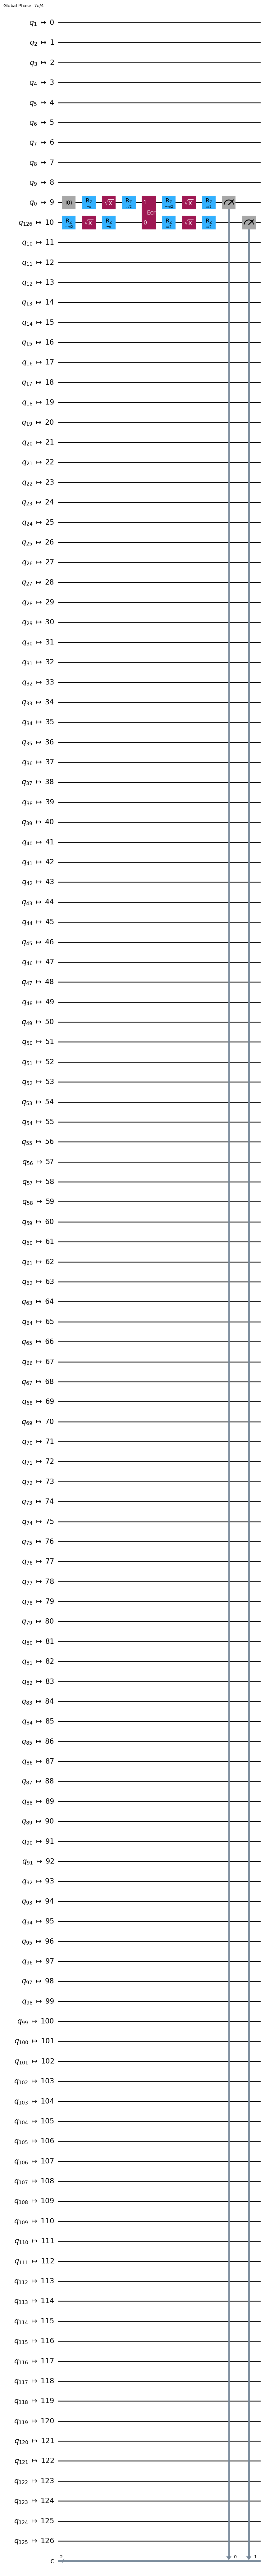

In [10]:
ibm_brisbane_trans_qc.draw('mpl')

In [11]:
from qiskit.providers.jobstatus import JobStatus
import time

job = ibm_brisbane_backend.run(ibm_brisbane_trans_qc, shots=1024)
#job = backend.run(qc, shots=2048) # if you don’t pass a shots kwarg, it defaults to 1024

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
#while job.status() is not JobStatus.DONE:
#	print("Job status is", job.status() )
#	time.sleep(60)
###while


IBMBackendApiError: 'Error submitting job: \'404 Client Error: Not Found for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"code":1211,"message":"Program not found.","solution":"Make sure you use a valid program name, such as \\\'sampler\\\' or \\\'estimator\\\'. Qiskit Runtime no longer supports the \\\'backend.run\\\' interface. Refer to the migration guide (https://docs.quantum.ibm.com/migration-guides/qiskit-runtime) for instructions to migrate to the primitives.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''

In [ ]:
# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

Job status is JobStatus.DONE


In [ ]:
# Retrieve the job
#job = backend.retrieve_job(job_id)

In [ ]:
# 결과 출력
counts = job.result().get_counts()
print(counts)

{'10': 29, '11': 491, '00': 441, '01': 63}


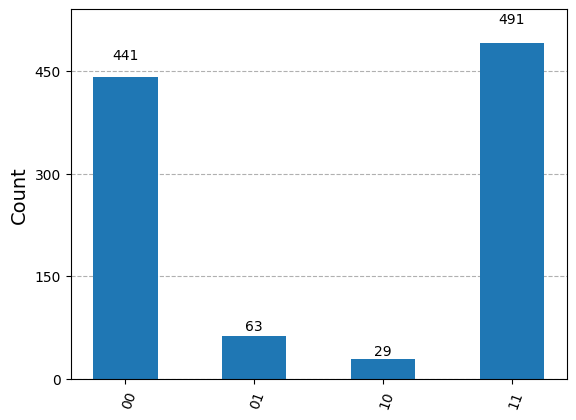

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)